In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [5]:
dataset=pd.read_csv(r'black_friday_sale_train.csv')

In [6]:
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [8]:
#printing the shape of dataset.
print(dataset.shape)

(550068, 12)


## Missing Values 

In [15]:
dataset.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [18]:
feature_with_nan=[features for features in dataset.columns if dataset[features].isnull().sum()>=1]

In [19]:
##Description ---Product_Category_2 Product may belongs to other category also
##            ---Product_Category_3 Product may belongs to other category also
feature_with_nan

['Product_Category_2', 'Product_Category_3']

## Relation Between Independent and Dependent Features 

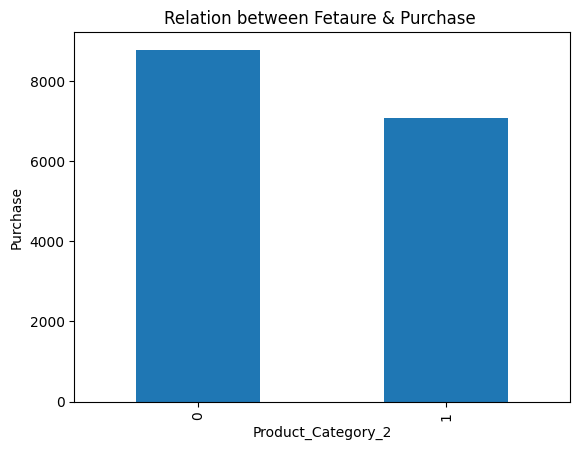

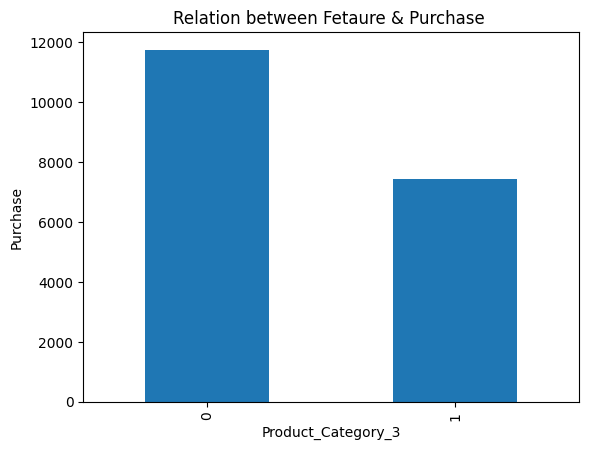

In [29]:
data=dataset.copy()
for feature in feature_with_nan:
    #replacing null values with 1 otherwise 0
    data[feature]=np.where(data[feature].isnull(),1,0)
    #let's calculate the median Purchase where the information is missing or present
    data.groupby(feature)['Purchase'].median().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Purchase')
    plt.title('Relation between Fetaure & Purchase ')
    plt.show()

**Relation Between Independent and Dependent Features**
### Observations

***Hence relation between missing values('Product_Category_2', 'Product_Category_3') and dependent feature(Purchase) is clearly visible, we have to replace them with proper values during feature engineering.***

## All numerical Variables

In [40]:
##printing all numerical variables 

numerical_features=[feature for feature in dataset.columns if dataset[feature].dtypes!='O']

In [57]:
## List of numerical_features
numerical_features

['User_ID',
 'Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

In [58]:
##printing the length of numerical_features
dataset[numerical_features].head()
print(len(numerical_features))

7


### Distribution of numerical variables

In [61]:
##Discrete numerical variables

discrete_features=[feature for feature in numerical_features if len(dataset[feature].unique())<=25]

In [62]:
discrete_features

['Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3']

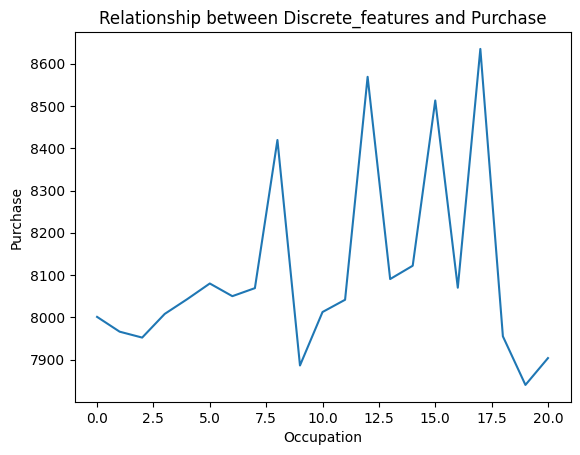

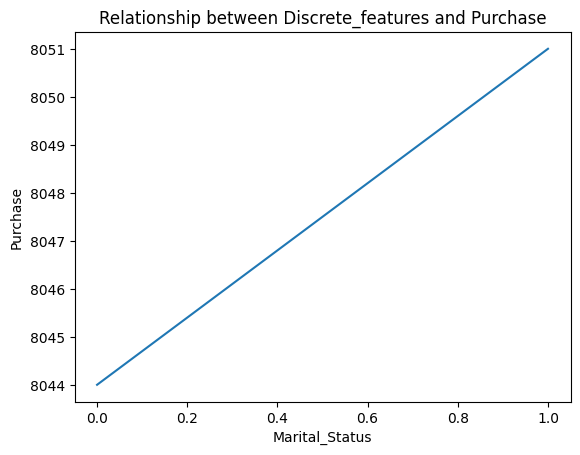

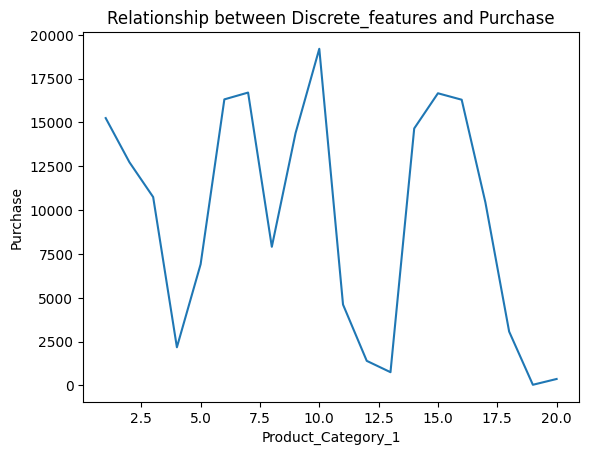

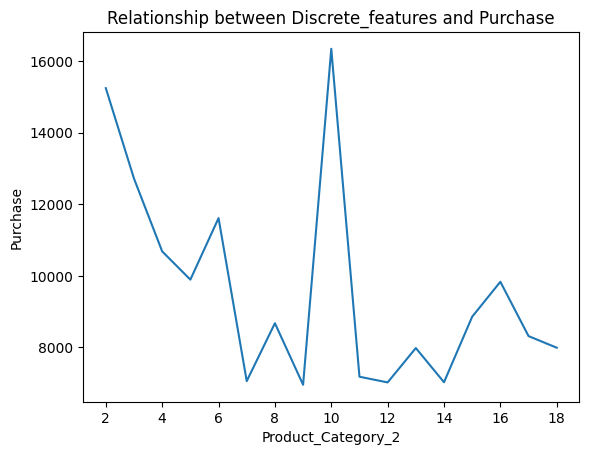

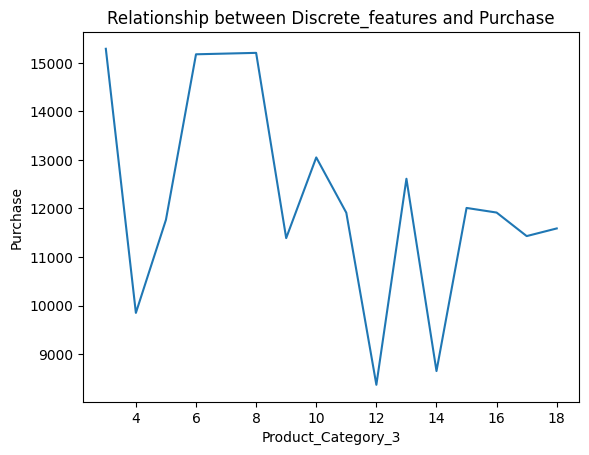

In [65]:
## lets find the relationship between Discrete_features and Purchase
data=dataset.copy()
for feature in discrete_features:
    data.groupby(feature)['Purchase'].median().plot()
    plt.xlabel(feature)
    plt.ylabel('Purchase')
    plt.title('Relationship between Discrete_features and Purchase')
    plt.show()

#### Discrete numerical variables
### Observation

**There is a realationship between discrete_features and Purchase**

In [67]:
## Continuous_features

continuous_features=[feature for feature in numerical_features if feature not in discrete_features]

In [68]:
continuous_features

['User_ID', 'Purchase']

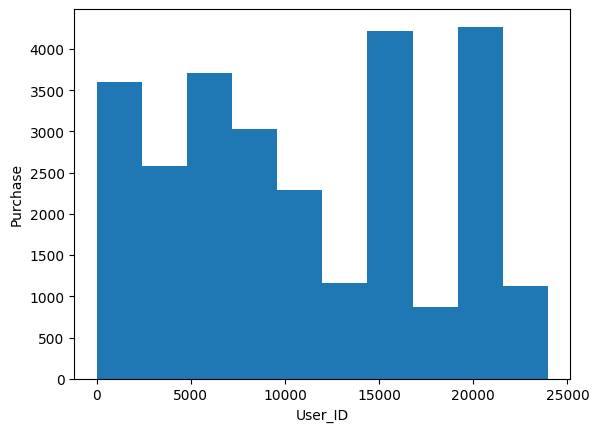

In [75]:
## Finding relation between Continuous_feature and Purchase
data=dataset.copy()
for feature in continuous_features:
    if feature!='Purchase':
        
        data[feature]=data['Purchase']-data[feature]
        data.groupby(feature)['Purchase'].median().plot(kind='hist')
        plt.xlabel(feature)
        plt.ylabel('Purchase')
        plt.show()

## categorical variables

In [77]:
##Printing categorical_variables
categorical_variables=[feature for feature in dataset.columns if data[feature].dtypes=='O']

In [78]:
categorical_variables

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

## Outliers

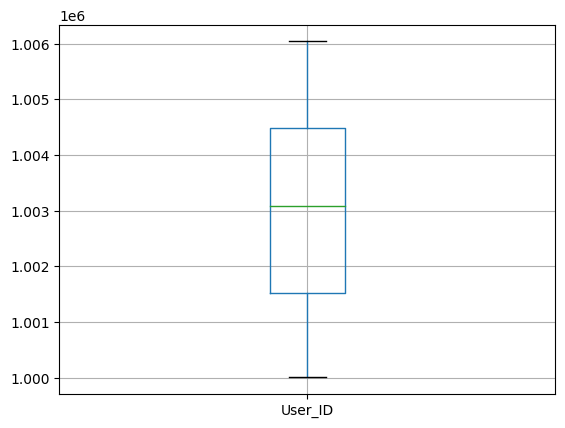

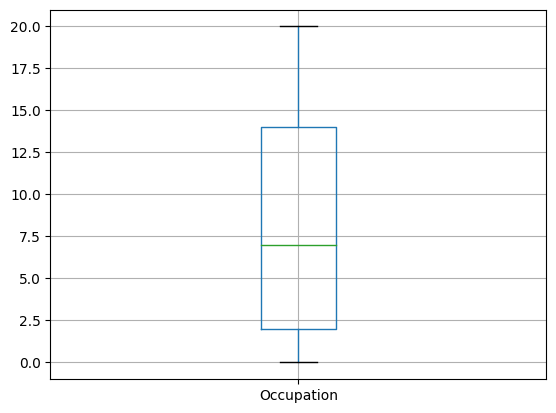

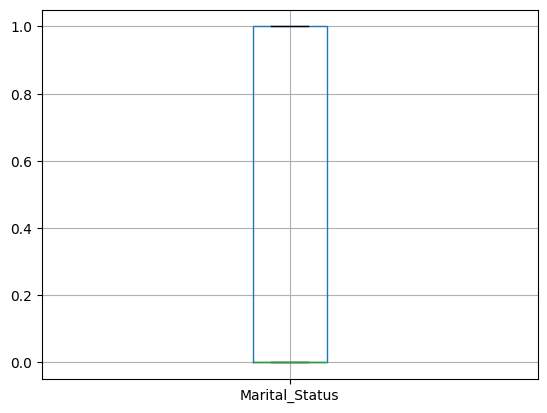

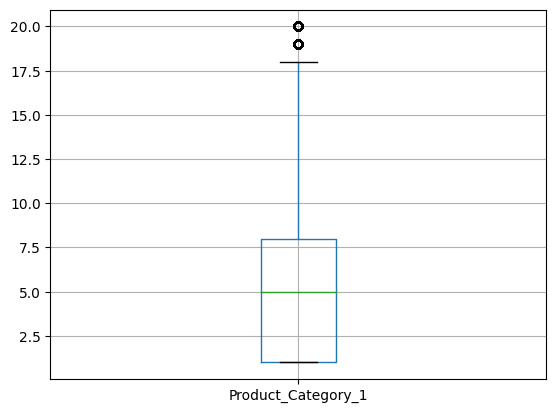

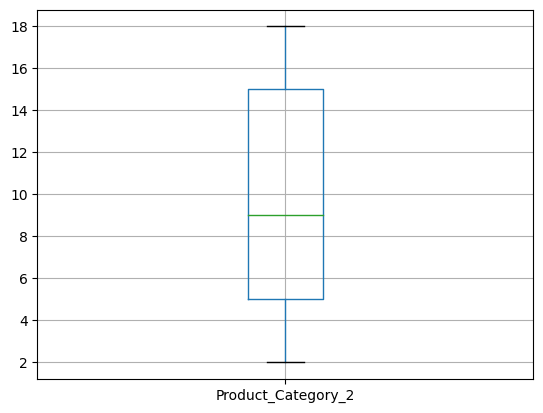

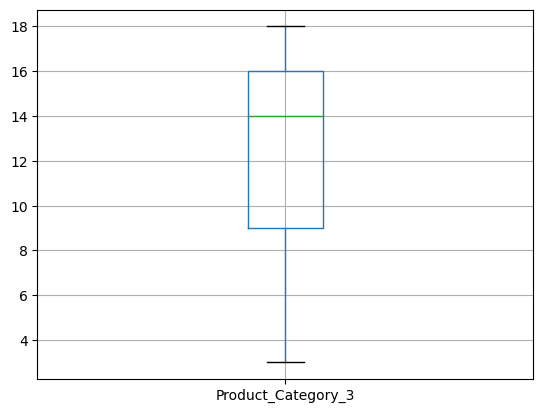

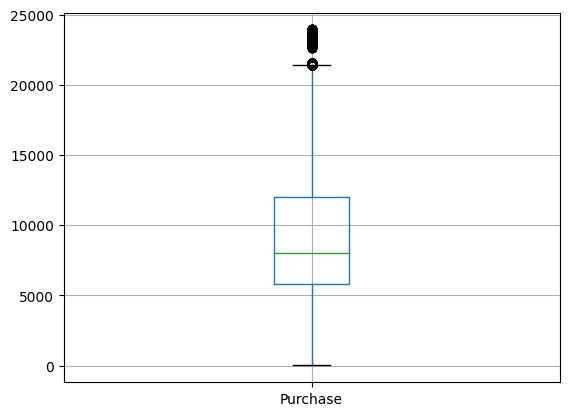

In [81]:
data=dataset.copy()
for feature in numerical_features:
    data.boxplot(column=feature)
    plt.show()